In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gnn import GNN

%matplotlib inline

In [2]:
def graphon1(u, v):
    return np.abs(np.sin(10*np.pi*(u - v)))

def graphon2(u, v):
    return np.sqrt(graphon1(u, v))

def graphon3(u, v):
    return np.abs(u - v)

def graphon4(u, v):
    return np.sqrt(np.abs(u - v))

def graphe_from_graphon(f, n):
    w = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            w[i][j] = f(i/n, j/n)
            w[j][i] = w[i][j]
    return w

# Cas 1

## Entraînement

In [3]:
epochMax = 15
lr = 1
n0 = 20
mMax = 100


S1 = graphe_from_graphon(graphon1, n0)
S2 = graphe_from_graphon(graphon2, n0)

X = np.random.rand(n0, mMax)

gnn1 = GNN(lr)
gnn2 = GNN(lr)

costListTrain1 = gnn1.fit(epochMax, S1, X, X - S1@X)
costListTrain2 = gnn2.fit(epochMax, S2, X, X - S2@X)

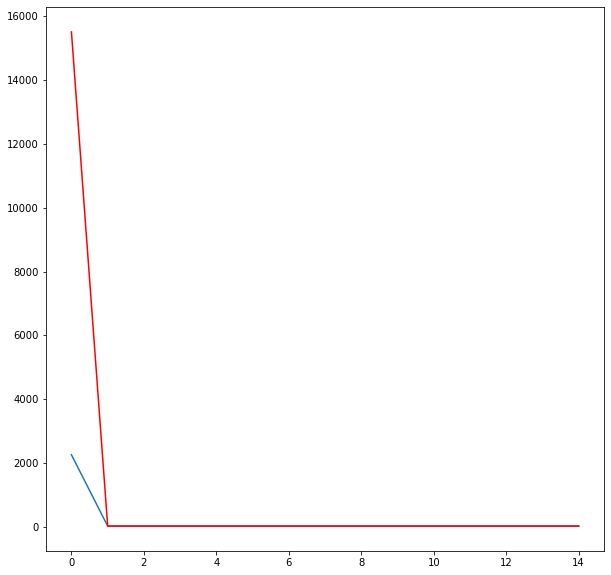

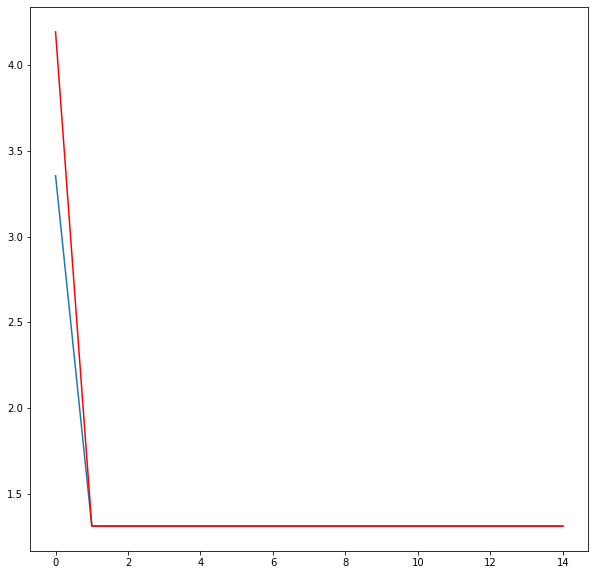

In [4]:
plt.figure(0, figsize=(10, 10))
plt.plot(costListTrain1)
plt.plot(costListTrain2, 'r')
plt.figure(1, figsize=(10, 10))
plt.plot(np.log10(costListTrain1))
plt.plot(np.log10(costListTrain2), 'r')
plt.show()

## Test transferabilité

In [5]:
Nmax = 100

costList1 = np.zeros(Nmax)
costList2 = np.zeros(Nmax)

prog = 0

for n in range(1, Nmax):
    if(100*n/Nmax >= prog):
        print(f"{prog}%")
        prog += 10

    I = np.eye(n)

    S1 = graphe_from_graphon(graphon1, n)
    S2 = graphe_from_graphon(graphon2, n)

    S1_2 = S1@S1
    S2_2 = S2@S2
    
    X = np.random.rand(n, mMax)
    for m in range(mMax):
        x = X[:, m].reshape(-1, 1)

        yp1 = gnn1.forwardpropagation(x, I, S1, S1_2)
        yp2 = gnn2.forwardpropagation(x, I, S2, S2_2)

        costList1[n] += gnn1.cost(x - S1@x, yp1)
        costList2[n] += gnn2.cost(x - S2@x, yp2)
    
    costList1[n] /= mMax
    costList2[n] /= mMax

print("100%")




0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%


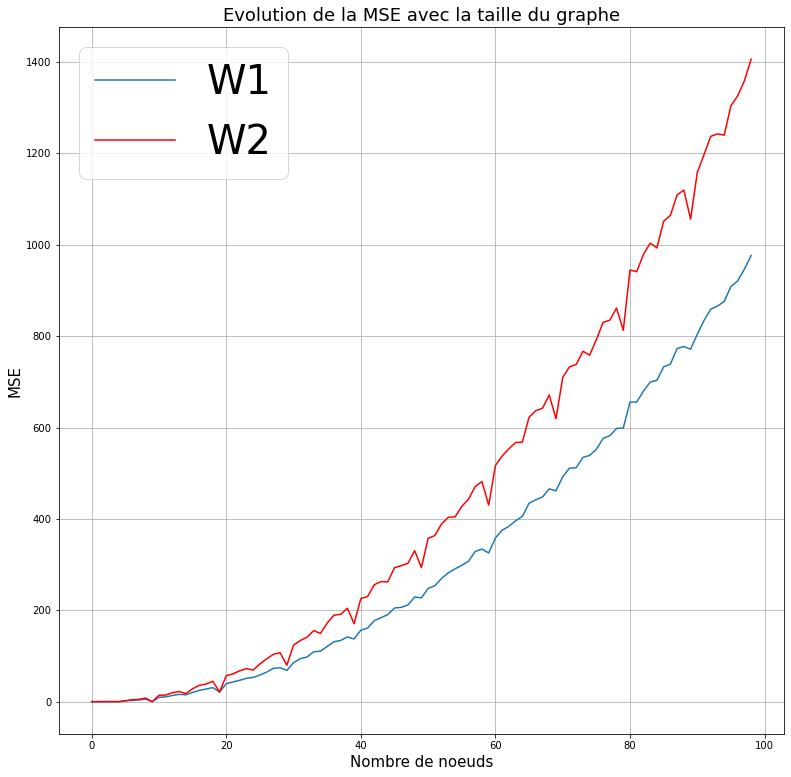

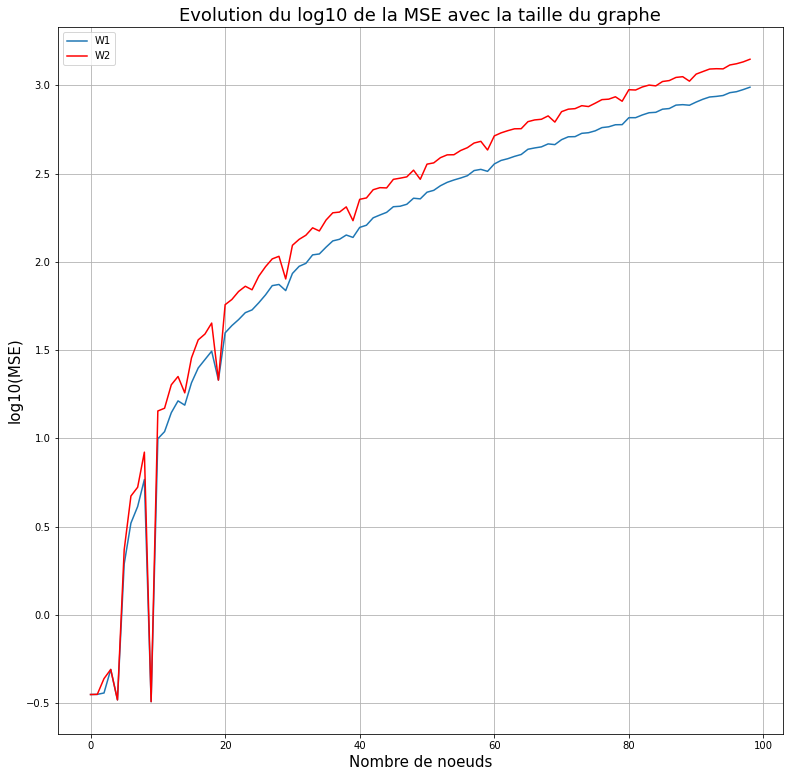

In [14]:
plt.figure(0, figsize=(13, 13))
plt.plot(costList1[1:], label="W1")
plt.plot(costList2[1:], "r", label="W2")
plt.xlabel("Nombre de noeuds", fontsize=20)
plt.ylabel("MSE", fontsize=20)
#plt.title("Evolution de la MSE avec la taille du graphe", fontsize=18)
plt.grid()
plt.legend(prop={'size': 40})


plt.figure(1, figsize=(13, 13))
plt.plot(np.log10(costList1[1:]), label="W1")
plt.plot(np.log10(costList2[1:]), "r", label="W2")
plt.xlabel("Nombre de noeuds", fontsize=15)
plt.ylabel("log10(MSE)", fontsize=15)
plt.title("Evolution du log10 de la MSE avec la taille du graphe", fontsize=18)
plt.grid()
plt.legend()

plt.show()


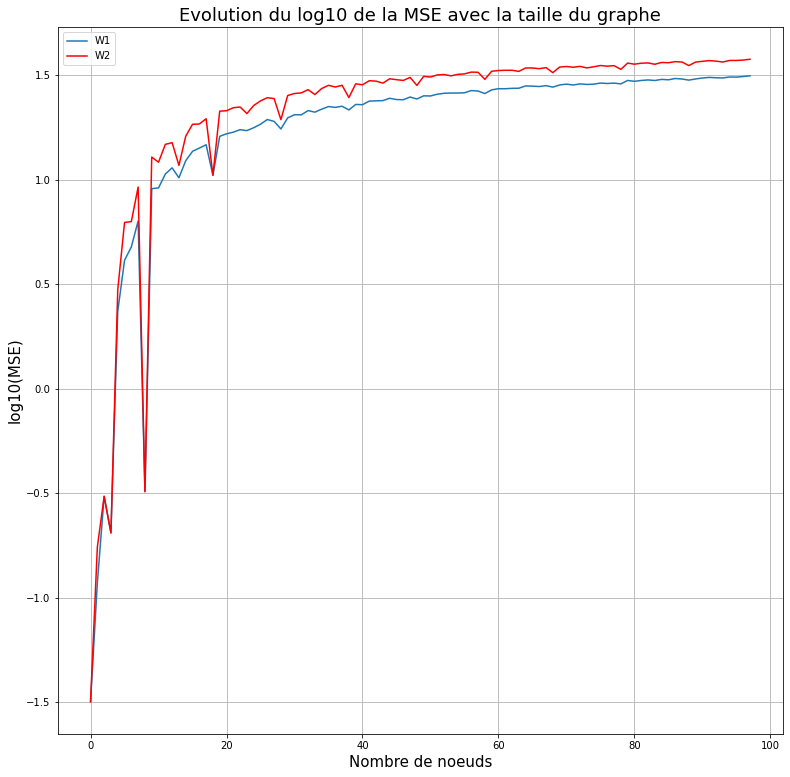

In [16]:
plt.figure(1, figsize=(13, 13))
plt.plot(np.log10(costList1[2:])/np.log10([i for i in range(2, 100)]), label="W1")
plt.plot(np.log10(costList2[2:]) /
         np.log10([i for i in range(2, 100)]), "r", label="W2")
plt.grid()
plt.legend()

plt.show()


# Cas 2

In [7]:
epochMax = 15
lr = 1 
n0 = 20
mMax = 100


S3 = graphe_from_graphon(graphon3, n0)
S4 = graphe_from_graphon(graphon4, n0)

X = np.random.rand(n0, mMax)

gnn3 = GNN(lr)
gnn4 = GNN(lr)

costListTrain3 = gnn3.fit(epochMax, S3, X, X - S3@X)
costListTrain4 = gnn4.fit(epochMax, S4, X, X - S4@X)

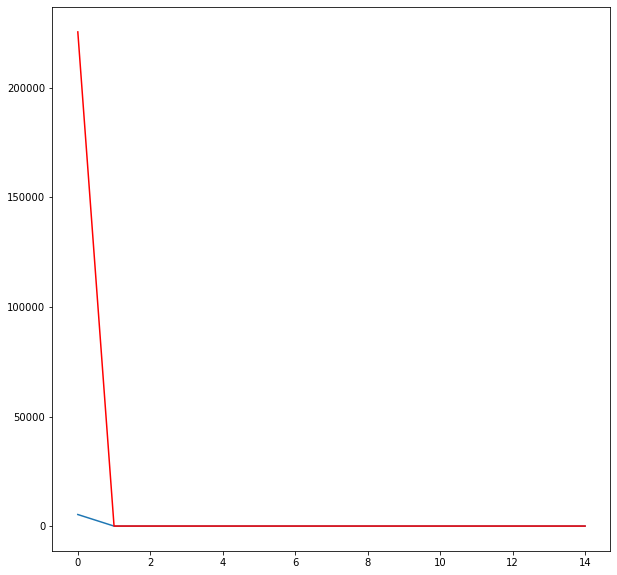

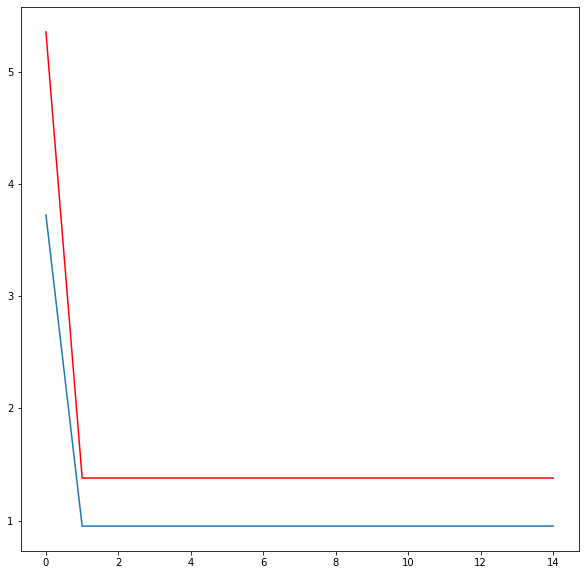

In [8]:
plt.figure(0, figsize=(10, 10))
plt.plot(costListTrain3)
plt.plot(costListTrain4, 'r')
plt.figure(1, figsize=(10, 10))
plt.plot(np.log10(costListTrain3))
plt.plot(np.log10(costListTrain4), 'r')
plt.show()


## Test transferabilité

In [9]:
Nmax = 100

costList3 = np.zeros(Nmax)
costList4 = np.zeros(Nmax)

prog = 0

for n in range(1, Nmax):
    if(100*n/Nmax >= prog):
        print(f"{prog}%")
        prog += 10
        
    I = np.eye(n)

    S3 = graphe_from_graphon(graphon3, n)
    S4 = graphe_from_graphon(graphon4, n)

    S3_2 = S3@S3
    S4_2 = S4@S4

    X = np.random.rand(n, mMax)

    for m in range(mMax):
        x = X[:, m].reshape(-1, 1)

        yp3 = gnn3.forwardpropagation(x, I, S3, S3_2)
        yp4 = gnn4.forwardpropagation(x, I, S4, S4_2)

        costList3[n] += gnn3.cost(x - S3@x, yp3)
        costList4[n] += gnn4.cost(x - S4@x, yp4)

    costList3[n] /= mMax
    costList4[n] /= mMax

print("100%")


0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%


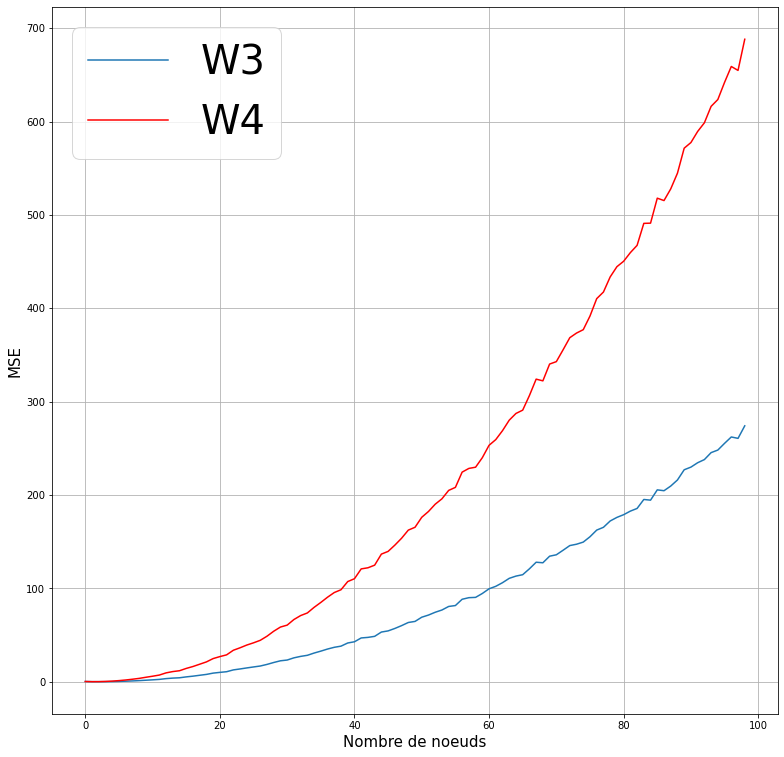

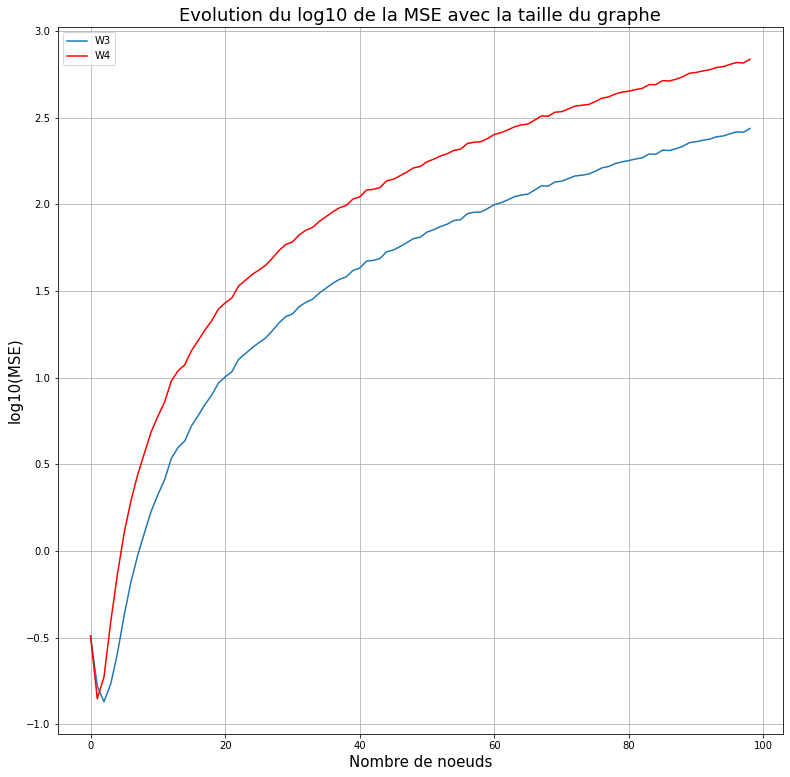

In [20]:
plt.figure(0, figsize=(13, 13))
plt.plot(costList3[1:], label="W3")
plt.plot(costList4[1:], "r", label="W4")
plt.xlabel("Nombre de noeuds", fontsize=15)
plt.ylabel("MSE", fontsize=15)
#plt.title("Evolution de la MSE avec la taille du graphe", fontsize=18)
plt.grid()
plt.legend(prop={'size': 40})


plt.figure(1, figsize=(13, 13))
plt.plot(np.log10(costList3[1:]), label="W3")
plt.plot(np.log10(costList4[1:]), "r", label="W4")
plt.xlabel("Nombre de noeuds", fontsize=15)
plt.ylabel("log10(MSE)", fontsize=15)
plt.title("Evolution du log10 de la MSE avec la taille du graphe", fontsize=18)
plt.grid()
plt.legend()

plt.show()
